<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Model-Evaluation-using-module-&quot;bp&quot;" data-toc-modified-id="Model-Evaluation-using-module-&quot;bp&quot;-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation using module "bp"</a></span><ul class="toc-item"><li><span><a href="#Accuracy-Precision-and-Recall" data-toc-modified-id="Accuracy-Precision-and-Recall-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Accuracy Precision and Recall</a></span></li><li><span><a href="#Classificaion-Report" data-toc-modified-id="Classificaion-Report-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Classificaion Report</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Area-Under-the-Curve" data-toc-modified-id="Area-Under-the-Curve-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Area Under the Curve</a></span></li></ul></li></ul></div>

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%load_ext watermark

%autoreload 2
%watermark -a "Bhishan Poudel" -d -v -m
%watermark -iv

Bhishan Poudel 2021-07-11 

CPython 3.7.7
IPython 7.22.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
pandas  1.2.4
seaborn 0.11.0
numpy   1.19.5



In [2]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/")
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan")
from bhishan import bp

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Load data

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# detailed description using my module bp
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


df.bp.describe()

,Feature,Type,N,Count,Unique,Missing,MissingPct,Zeros,ZerosPct,Ones,OnesPct,mean,std,min,max,25%,50%,75%,Feature2,smallest5,largest5,first5,last5
11,deck,category,891,203,7,688,77.22,0,0.00,0,0.00,,,,,,,,deck,"['A', 'A', 'A', 'A', 'A']","['G', 'G', 'G', 'G', 'F']","[nan, 'C', nan, 'C', nan]","[nan, 'B', nan, 'C', nan]"
3,age,float64,891,714,88,177,19.87,0,0.00,7,0.79,29.70,14.53,0.42,80.00,20.12,28.00,38.00,age,"[0.42, 0.67, 0.75, 0.75, 0.83]","[80.0, 74.0, 71.0, 71.0, 70.5]","[22.0, 38.0, 26.0, 35.0, 35.0]","[27.0, 19.0, nan, 26.0, 32.0]"
7,embarked,object,891,889,3,2,0.22,0,0.00,0,0.00,,,,,,,,embarked,"['C', 'C', 'C', 'C', 'C']","['S', 'S', 'S', 'S', 'S']","['S', 'C', 'S', 'S', 'S']","['S', 'S', 'S', 'C', 'Q']"
12,embark_town,object,891,889,3,2,0.22,0,0.00,0,0.00,,,,,,,,embark_town,"['Cherbourg', 'Cherbourg', 'Cherbourg', 'Cherbourg', 'Cherbourg']","['Southampton', 'Southampton', 'Southampton', 'Southampton', 'Southampton']","['Southampton', 'Cherbourg', 'Southampton', 'Southampton', 'Southampton']","['Southampton', 'Southampton', 'Southampton', 'Cherbourg', 'Queenstown']"
5,parch,int64,891,891,7,0,0.00,678,76.09,118,13.24,0.38,0.81,0.00,6.00,0.00,0.00,0.00,parch,"[0, 0, 0, 0, 0]","[6, 5, 5, 5, 5]","[0, 0, 0, 0, 0]","[0, 0, 2, 0, 0]"
4,sibsp,int64,891,891,7,0,0.00,608,68.24,209,23.46,0.52,1.10,0.00,8.00,0.00,0.00,1.00,sibsp,"[0, 0, 0, 0, 0]","[8, 8, 8, 8, 8]","[1, 1, 0, 1, 0]","[0, 0, 1, 0, 0]"
0,survived,int64,891,891,2,0,0.00,549,61.62,342,38.38,0.38,0.49,0.00,1.00,0.00,0.00,1.00,survived,"[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[0, 1, 1, 1, 0]","[0, 1, 0, 1, 0]"
10,adult_male,bool,891,891,2,0,0.00,354,39.73,537,60.27,,,,,,,,adult_male,"[False, False, False, False, False]","[True, True, True, True, True]","[True, False, False, False, True]","[True, False, False, True, True]"
14,alone,bool,891,891,2,0,0.00,354,39.73,537,60.27,,,,,,,,alone,"[False, False, False, False, False]","[True, True, True, True, True]","[False, False, True, False, True]","[True, True, False, True, True]"
6,fare,float64,891,891,248,0,0.00,15,1.68,0,0.00,32.20,49.69,0.00,512.33,7.91,14.45,31.00,fare,"[0.0, 0.0, 0.0, 0.0, 0.0]","[512.3292, 512.3292, 512.3292, 263.0, 263.0]","[7.25, 71.2833, 7.925, 53.1, 8.05]","[13.0, 30.0, 23.45, 30.0, 7.75]"


# Modelling

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
target = 'survived'
features = ['pclass','age','sibsp','parch','fare','alone']
df = df[features+[target]].dropna()

X = df[features].astype(np.float32).values
y = df[target]

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state=100,stratify=y)

In [8]:
clf_lr = LogisticRegression(random_state=100)
clf_lr.fit(Xtrain,ytrain)

ypreds_lr = clf_lr.predict(Xtest)

# Model Evaluation using module "bp"

In [9]:
from sklearn import metrics as skmetrics

## Accuracy Precision and Recall

In [10]:
# get a nice dataframe with various scaler model evaluation metrics
df_eval = bp.get_binary_classification_scalar_metrics(
    "Logistic Regression",
    clf_lr,
    Xtest,ytest,
    ypreds_lr,
    desc="Default", df_eval=None)

,Model,Description,Accuracy,Precision,Recall,F0.5,F1,F2,Mathews_Correlation_Coefficient,Cohens_Kappa,Area_Under_Precision_Recall_Curve,Area_Under_ROC_Curve
0,Logistic Regression,Default,0.743017,0.754717,0.547945,0.701754,0.634921,0.579710,0.457815,0.444249,0.730346,0.784247


## Classificaion Report

In [11]:
# get classification report
df_clf_report = bp.get_binary_classification_report("Logistic Regression",
  ytest,ypreds_lr,
  desc='',
  style_col='Recall_1',
  df_clf_report=None)

,Model,Description,Precision_0,Precision_1,Recall_0,Recall_1,F1_Score_0,F1_Score_1,Support_0,Support_1
0,Logistic Regression,,0.738095,0.754717,0.877358,0.547945,0.801724,0.634921,106.000000,73.000000


In [12]:
print(skmetrics.classification_report(ytest,ypreds_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       106
           1       0.75      0.55      0.63        73

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.74      0.74      0.73       179



## Confusion Matrix

In [13]:
df_out = pd.DataFrame({'ytest': ytest, 'ypreds': ypreds_lr})
df_out.head()

,ytest,ypreds
9,1,1
374,0,0
733,0,0
821,1,0
528,0,0


In [14]:
pd.crosstab(df_out['ytest'],df_out['ypreds'])

ypreds,0,1
ytest,,
0,93,13
1,33,40


In [15]:
cm = skmetrics.confusion_matrix(ytest,ypreds_lr)
print(cm)

[[93 13]
 [33 40]]


In [16]:
df_cm = bp.print_confusion_matrix('Logistic Regression', ytest,ypreds_lr,
                                  zero='Alive',one='Dead')

,Predicted_Alive,Predicted_Dead,Total_Alive,Correct_Alive,Incorrect_Alive,Alive_Detection,Total_Dead,Correct_Dead,Incorrect_Dead,Dead_Detection
Alive,93,13,106,93,13,87.74%,73,40,33,54.79%
Dead,33,40,106,93,13,87.74%,73,40,33,54.79%


In [17]:
bp.plot_confusion_matrix_plotly(ytest,ypreds_lr,labels=['Alive','Dead'])

## Area Under the Curve

In [18]:
yprobs = clf_lr.predict_proba(Xtest)
yprobs[:5]

array([[0.31097563, 0.68902437],
       [0.68147744, 0.31852256],
       [0.52856291, 0.47143709],
       [0.79029474, 0.20970526],
       [0.86451932, 0.13548068]])

In [19]:
# help(bp.show_methods)

In [20]:
bp.show_methods(bp,contains='auc')

,0,1,2
0,plot_roc_auc,,


In [21]:
ytest.shape, yprobs.shape

((179,), (179, 2))

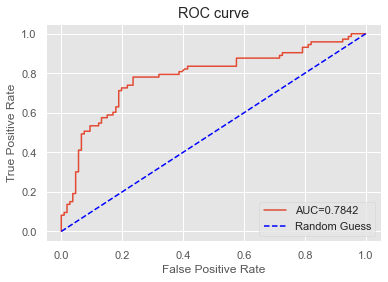

In [22]:
bp.plot_roc_auc(ytest,yprobs)

In [23]:
# using scikitplot

In [24]:
from scikitplot import metrics as skpmetrics

In [26]:
bp.show_methods(skpmetrics,starts='plot')

,0,1,2
0,plot_calibration_curve,plot_lift_curve,plot_roc
1,plot_confusion_matrix,plot_precision_recall,plot_roc_curve
2,plot_cumulative_gain,plot_precision_recall_curve,plot_silhouette
3,plot_ks_statistic,,


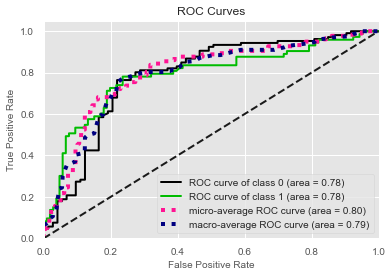

In [27]:
skpmetrics.plot_roc(ytest,yprobs)